In [1]:
from __future__ import division
from spotify_client import SpotifyClient
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt


In [2]:
def centrality_popularity(centralities,popularities, label): 
    plt.scatter(centralities,popularities)
    plt.xlabel(label)
    plt.ylabel('Popularity')
    plt.show()

In [3]:
def centrality_followers(centralities,followers,label): 
        
    plt.scatter(centralities, followers)
    plt.xlabel(label)
    plt.ylabel('followers')    
    plt.show()      

In [4]:
df=pd.read_csv("artists_df.csv",index_col=0)
G=nx.read_gexf("rw.gexf")  

print("num of edges:",G.number_of_edges())
print("num of edges:",G.number_of_nodes())
indegree_centrality= G.in_degree()
#indegree_centrality.update((x, y*2) for x, y in indegree_centrality.items())
between_centrality=nx.betweenness_centrality(G)    
eigen_centrality= nx.eigenvector_centrality_numpy(G)
eigen_centrality_numpy=nx.eigenvector_centrality_numpy(G)    
closeness_centrality= nx.closeness_centrality(G)  
page_rank= nx.pagerank(G, alpha=0.9)
    

num of edges: 839
num of edges: 200


In [5]:
df['indegreeCentrality']= ""
df['eigenCentrality']=""
df['betweenCentrality']=""
df['closenessCentrality']=""
df['pageRank']=""

In [6]:
for index, row in df.iterrows():
   
    df.set_value(index,'indegreeCentrality',indegree_centrality[row['artistId']])
    df.set_value(index,'eigenCentrality',eigen_centrality_numpy[row['artistId']])
    df.set_value(index,'betweenCentrality',between_centrality[row['artistId']])
    df.set_value(index,'closenessCentrality',closeness_centrality[row['artistId']])
    df.set_value(index,'pageRank',page_rank[row['artistId']])
   

In [7]:
df.head(10)

,artistId,name,relatedArtists,followers,popularity,genres,indegreeCentrality,eigenCentrality,betweenCentrality,closenessCentrality,pageRank
1,05owR1ds02eaZgCrtfATRF,Fereshteh,"['7DCmQW885aZQY5fhN1C2PD', '7MYldHzLrKMxUl7AcN...",514,10,['classic persian pop'],2,9.59393e-07,0.0151488,0.0604207,0.000920257
2,7MYldHzLrKMxUl7AcNTmHO,Giti,"['7DCmQW885aZQY5fhN1C2PD', '05owR1ds02eaZgCrtf...",678,14,['classic persian pop'],1,1.91922e-07,0.000673653,0.0561227,0.000679693
3,4DKaZIByJZluOmixSYIjjk,Siavash Ghomayshi,"['2jvB5M73tBZlWybPmxIaw7', '1xA7r3Y1UGCp3rQMkg...",26353,39,['classic persian pop'],4,4.11121e-06,0.00472031,0.167752,0.010359
4,2jvB5M73tBZlWybPmxIaw7,Dariush,"['5b1CDxqOGnXr5M1DUn2XQh', '5WCHc16VvzVCmBKH70...",21990,39,['classic persian pop'],19,1.31812e-05,0.0368369,0.193193,0.0303085
5,5WCHc16VvzVCmBKH70CYfw,Moein,"['2jvB5M73tBZlWybPmxIaw7', '5b1CDxqOGnXr5M1DUn...",22863,42,['classic persian pop'],5,4.6052e-06,0.0132487,0.165259,0.0111426
6,56m55Jl81jGd7q54U0IAOE,Afshin,"['1gej3rNdgoHFpH0D4Nxupv', '5WCHc16VvzVCmBKH70...",4906,35,"['classic persian pop', 'persian pop']",6,1.01019e-06,0.0115728,0.13881,0.00358359
7,4NdEcxTgFXf083ttLRBZOE,Bijan Mortazavi,"['5b1CDxqOGnXr5M1DUn2XQh', '0cuFX3PhgtIqQDKPLC...",5524,29,['classic persian pop'],13,1.37881e-05,0.0232515,0.176467,0.0248342
8,5vGVXwtTLpfUyOxX5nkV0P,Mahasti,"['1FEABcMZtFitRlvH8V0UJI', '2qNu2Ys8ePDMvKwixW...",12451,32,"['classic persian pop', 'persian traditional']",6,9.8311e-06,0.0060737,0.163273,0.0160688
9,3meYUCHyh5OayViOog5daw,Shahram Nazeri,"['45EXJ1cQAEt8k2zIYHyLBm', '129o0b0q8hAgjrd7jD...",9552,29,"['classic persian pop', 'persian traditional']",9,8.64701e-11,0.0492269,0.0832481,0.00862911
10,5Uj3HYkiz1cn32IPHMqhOy,Homayoun Shajarian,"['45EXJ1cQAEt8k2zIYHyLBm', '129o0b0q8hAgjrd7jD...",19777,37,"['classic persian pop', 'persian traditional']",11,7.35206e-11,0.0552625,0.0796687,0.00986513


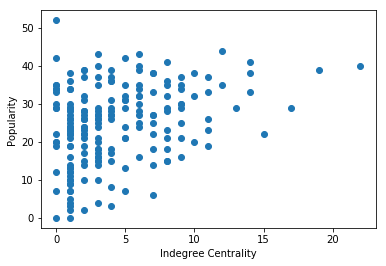

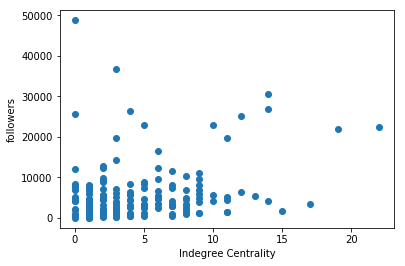

In [8]:
centrality_popularity(df['indegreeCentrality'], df['popularity'], 'Indegree Centrality' )
centrality_followers(df['indegreeCentrality'], df['followers'], 'Indegree Centrality' )

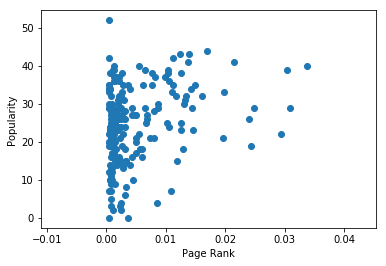

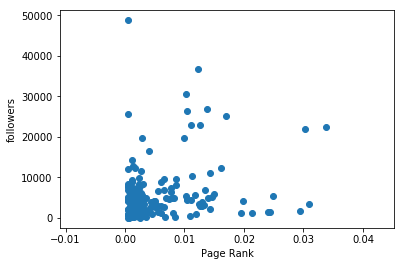

In [9]:
centrality_popularity(df['pageRank'], df['popularity'], 'Page Rank' )
centrality_followers(df['pageRank'], df['followers'], 'Page Rank' )

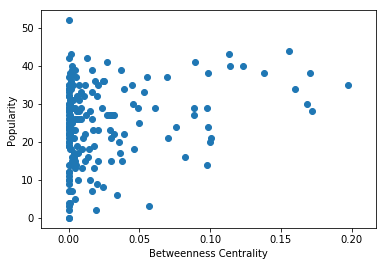

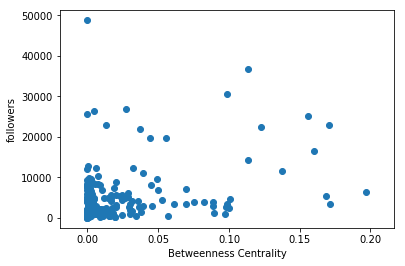

In [10]:
centrality_popularity(df['betweenCentrality'], df['popularity'], 'Betweenness Centrality' )
centrality_followers(df['betweenCentrality'], df['followers'], 'Betweenness Centrality' )

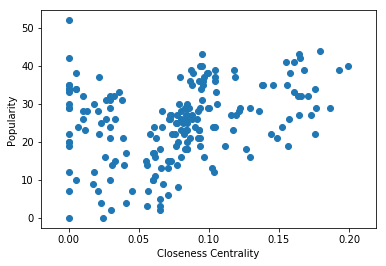

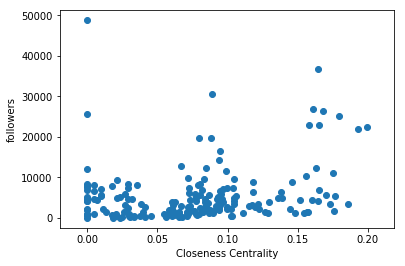

In [11]:
centrality_popularity(df['closenessCentrality'], df['popularity'], 'Closeness Centrality' )
centrality_followers(df['closenessCentrality'], df['followers'], 'Closeness Centrality' )

In [12]:
def average_overlap(df1,df2,depth):
        temp1=[]
        temp2=[]
        AO=0
        for i in range(depth):      
            temp1.append(df1.iloc[i]['artistId'])
            temp2.append(df2.iloc[i]['artistId'])
            overlap=len(set(temp1) & set(temp2))  
            overlap=overlap/(i+1)        
            AO +=overlap
        
        AO= AO/depth
        return AO

In [13]:
print("{0:.2f}".format(average_overlap(df.sort_values('indegreeCentrality', ascending=False),df.sort_values('popularity', ascending=False), 20 )))
print("{0:.2f}".format(average_overlap(df.sort_values('indegreeCentrality', ascending=False),df.sort_values('followers', ascending=False), 20 )))

0.15
0.27


In [14]:
df1=df.sort_values('indegreeCentrality', ascending=False)

In [15]:
df1.head()

,artistId,name,relatedArtists,followers,popularity,genres,indegreeCentrality,eigenCentrality,betweenCentrality,closenessCentrality,pageRank
31,5b1CDxqOGnXr5M1DUn2XQh,Hayedeh,"['2jvB5M73tBZlWybPmxIaw7', '1FEABcMZtFitRlvH8V...",22334,40,['classic persian pop'],22,1.82769e-05,0.123005,0.199172,0.0337749
4,2jvB5M73tBZlWybPmxIaw7,Dariush,"['5b1CDxqOGnXr5M1DUn2XQh', '5WCHc16VvzVCmBKH70...",21990,39,['classic persian pop'],19,1.31812e-05,0.0368369,0.193193,0.0303085
26,0EffwahbVorwsGoVtfovXM,Hengameh,"['3Tf5EjUPHi04W0filXAkrG', '5coMLgB6HtAg6rf9QV...",3379,29,"['classic persian pop', 'persian pop']",17,0.457732,0.0610141,0.186136,0.0309315
18,3Tf5EjUPHi04W0filXAkrG,Nooshafarin,"['0EffwahbVorwsGoVtfovXM', '5akOgE7THgqgmt4fAx...",1753,22,['classic persian pop'],15,0.452868,0.0318079,0.175959,0.0293744
50,3ik1ITmfyz6tnIgodqEHlz,Masoud Sadeghloo,"['5soNWYxH02JzesP081GwEl', '67kWRUuakWQ7zpgUCL...",4101,33,['persian pop'],14,1.22417e-07,0.016744,0.104816,0.0198342


In [16]:
df1[df1['popularity']<20]

,artistId,name,relatedArtists,followers,popularity,genres,indegreeCentrality,eigenCentrality,betweenCentrality,closenessCentrality,pageRank
111,2Y2gsVQ9NzlSlQdCgnQ6ug,Shahrokh,"['0EffwahbVorwsGoVtfovXM', '3Tf5EjUPHi04W0filX...",1418,19,['classic persian pop'],11,0.401167,0.00600034,0.156383,0.0244057
67,5TJxWW696uXFzZYpp9b6nk,Farzin,"['69bVyzCRQweGwImywypLRD', '5akOgE7THgqgmt4fAx...",1313,16,['classic persian pop'],9,0.0637279,0.00344087,0.129136,0.0060411
57,1grC023GSmH0FTqX3Pwxgw,Elaheh,"['6XJ5KXl0DaiBPd5xH5x7i5', '25MK2fNxURgal32iaf...",1400,15,"['classic persian pop', 'persian traditional']",8,1.87395e-05,0.0375107,0.0709347,0.0032896
168,55eAm6u8p3FNbnOMlL0tfy,Jalil Shahnaz,"['7gDiOICKaYVFJugoruVGlS', '1Hf2M5agx5UUq70iTJ...",1083,15,['persian traditional'],8,-1.08925e-16,0.0299448,0.0549718,0.0119644
142,4uGBJ4gqsK7NAUb3DKTL7Q,Wantons,"['2SFwcduI9cdZsG6UxnBm3C', '5y33cZ1Lo1YVUjraV8...",3054,18,['persian hip hop'],8,9.78136e-10,0.00107572,0.0844452,0.0128763
46,7IHTK9lmwhFuuJ2ditvlQr,Kouros Sarhangzadeh,"['6AjwgAZIBM1QvBEc6tioCz', '1grC023GSmH0FTqX3P...",583,6,"['classic persian pop', 'persian traditional']",7,1.81146e-05,0.034429,0.0708936,0.00310675
45,6XJ5KXl0DaiBPd5xH5x7i5,Houshmand Aghili,"['1grC023GSmH0FTqX3Pwxgw', '25MK2fNxURgal32iaf...",1023,14,['classic persian pop'],7,3.90024e-05,0.0973956,0.0774487,0.00289522
78,5F3JQSbuDo4pWGLC2UTLTI,The Ways,"['0tctijgZruddzQ8FCgvDj2', '4besYDIj6c0kONEoL2...",2860,18,['persian alternative'],7,1.74143e-10,0.0459128,0.0845138,0.00607284
79,4besYDIj6c0kONEoL2fFqP,Radio Tehran,"['5YoplpynBN976eNYXe9ZrF', '01xUafSGlkbklhhima...",2453,16,['persian alternative'],6,6.61684e-11,0.0133349,0.0801386,0.00426281
167,3fdDkhBEDruWRwbxaO9jUL,Ahmad Ebadi,"['0VBhf7JZeqXh9k9fMBjbDL', '1Hf2M5agx5UUq70iTJ...",557,7,['persian traditional'],5,-8.80372e-17,0.0161443,0.0453518,0.0109338


In [17]:
print("{0:.2f}".format(average_overlap(df.sort_values('pageRank', ascending=False),df.sort_values('popularity', ascending=False), 20 )))
print("{0:.2f}".format(average_overlap(df.sort_values('pageRank', ascending=False),df.sort_values('followers', ascending=False), 20 )))

0.15
0.12


In [18]:
print("{0:.2f}".format(average_overlap(df.sort_values('betweenCentrality', ascending=False),df.sort_values('popularity', ascending=False), 20 )))
print("{0:.2f}".format(average_overlap(df.sort_values('betweenCentrality', ascending=False),df.sort_values('followers', ascending=False), 20 )))

0.22
0.25


In [19]:
print("{0:.2f}".format(average_overlap(df.sort_values('closenessCentrality', ascending=False),df.sort_values('popularity', ascending=False), 20 )))
print("{0:.2f}".format(average_overlap(df.sort_values('closenessCentrality', ascending=False),df.sort_values('followers', ascending=False), 20 )))

0.23
0.25


In [20]:
#pearson and spearman correlation 
print("Pearson corr of indegree centrality and popularity: {0:.2f}".format(df['indegreeCentrality'].astype('float64').corr(df['popularity'])))
print("Pearson corr of indegree centrality and followers: {0:.2f}".format(df['indegreeCentrality'].astype('float64').corr(df['followers'])))
print("Spearman corr of indegree centrality and popularity: {0:.2f}".format(df['indegreeCentrality'].astype('float64').corr(df['popularity'], method='spearman')))
print("Spearman corr of indegree centrality and followers:{0:.2f}".format(df['indegreeCentrality'].astype('float64').corr(df['followers'], method='spearman')))
print("Kendall corr of indegree centrality and popularity:{0:.2f}".format(df['indegreeCentrality'].astype('float64').corr(df['popularity'], method='kendall')))
print("Kendall corr of indegree centrality and followers:{0:.2f}".format(df['indegreeCentrality'].astype('float64').corr(df['followers'], method='kendall')))

Pearson corr of indegree centrality and popularity: 0.31
Pearson corr of indegree centrality and followers: 0.28
Spearman corr of indegree centrality and popularity: 0.28
Spearman corr of indegree centrality and followers:0.29
Kendall corr of indegree centrality and popularity:0.21
Kendall corr of indegree centrality and followers:0.21


In [21]:
print("Pearson corr of Page rank and popularity: {0:.2f}".format(df['pageRank'].astype('float64').corr(df['popularity'])))
print("Pearson corr of Page rank and followers:{0:.2f}".format(df['pageRank'].astype('float64').corr(df['followers'])))
print("Spearman corr of Page rank and popularity: {0:.2f}".format(df['pageRank'].astype('float64').corr(df['popularity'], method='spearman')))
print("Spearman corr of Page rank and followers:{0:.2f}".format(df['pageRank'].astype('float64').corr(df['followers'], method='spearman')))
print("Spearman corr of Page rank and popularity: {0:.2f}".format(df['pageRank'].astype('float64').corr(df['popularity'], method='kendall')))
print("Spearman corr of Page rank and followers:{0:.2f}".format(df['pageRank'].astype('float64').corr(df['followers'], method='kendall')))

Pearson corr of Page rank and popularity: 0.28
Pearson corr of Page rank and followers:0.25
Spearman corr of Page rank and popularity: 0.24
Spearman corr of Page rank and followers:0.20
Spearman corr of Page rank and popularity: 0.17
Spearman corr of Page rank and followers:0.15


In [22]:
print("Pearson corr of betweenness centrality and popularity:{0:.2f}".format(df['betweenCentrality'].astype('float64').corr(df['popularity'])))
print("Pearson corr of betweenness centrality and followers:{0:.2f}".format(df['betweenCentrality'].astype('float64').corr(df['followers'])))
print("Spearman corr of betweenness centrality and popularity:{0:.2f}".format(df['betweenCentrality'].astype('float64').corr(df['popularity'], method='spearman')))
print("Spearman corr of betweenness centrality and followers:{0:.2f}".format(df['betweenCentrality'].astype('float64').corr(df['followers'], method='spearman')))
print("Kendall corr of betweenness centrality and popularity:{0:.2f}".format(df['betweenCentrality'].astype('float64').corr(df['popularity'], method='kendall')))
print("Kendall corr of betweenness centrality and followers:{0:.2f}".format(df['betweenCentrality'].astype('float64').corr(df['followers'], method='kendall')))

Pearson corr of betweenness centrality and popularity:0.24
Pearson corr of betweenness centrality and followers:0.32
Spearman corr of betweenness centrality and popularity:0.17
Spearman corr of betweenness centrality and followers:0.22
Kendall corr of betweenness centrality and popularity:0.12
Kendall corr of betweenness centrality and followers:0.15


In [23]:
print("Pearson corr of closeness centrality and popularity:{0:.2f}".format(df['closenessCentrality'].astype('float64').corr(df['popularity'])))
print("Pearson corr of closeness centrality and followers:{0:.2f}".format(df['closenessCentrality'].astype('float64').corr(df['followers'])))
print("Spearman corr of closeness centrality and popularity:{0:.2f}".format(df['closenessCentrality'].astype('float64').corr(df['popularity'], method='spearman')))
print("Spearman corr of closeness centrality and followers:{0:.2f}".format(df['closenessCentrality'].astype('float64').corr(df['followers'], method='spearman')))
print("Kendall corr of closeness centrality and popularity:{0:.2f}".format(df['closenessCentrality'].astype('float64').corr(df['popularity'], method='kendall')))
print("Kendall corr of closeness centrality and followers:{0:.2f}".format(df['closenessCentrality'].astype('float64').corr(df['followers'], method='kendall')))

Pearson corr of closeness centrality and popularity:0.32
Pearson corr of closeness centrality and followers:0.23
Spearman corr of closeness centrality and popularity:0.35
Spearman corr of closeness centrality and followers:0.25
Kendall corr of closeness centrality and popularity:0.25
Kendall corr of closeness centrality and followers:0.18


In [24]:
df.to_csv("artists_df.csv")

In [25]:
 nx.write_gexf(G, "rw.gexf") 